In [2]:
from Utils.data_generators import *
from Utils.util_plotting import *
from Utils.util_data_preprocessing import *
package = 'prim'

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:59: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_d

experiment 750/750

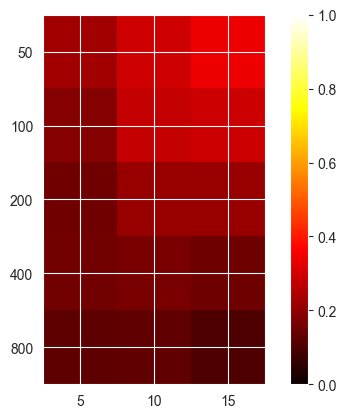

[[0.61031384 0.62178919 0.63512923]
 [0.65381786 0.68458393 0.69976719]
 [0.72538371 0.76099403 0.78475888]
 [0.73210693 0.82050908 0.84499121]
 [0.77081072 0.86122071 0.89790695]]
[[0.83986317 0.9181708  0.97611391]
 [0.83997653 0.96358274 0.99236495]
 [0.88125695 0.97489093 0.99582619]
 [0.88963842 0.98717186 0.9970718 ]
 [0.89758901 0.9924348  1.        ]]


In [2]:
#whitout preprocessing
create_heatmap_generated_data_precision(calculate_y_oakley_ohagan2004, 15, package, None, 50)

experiment 1500/1500

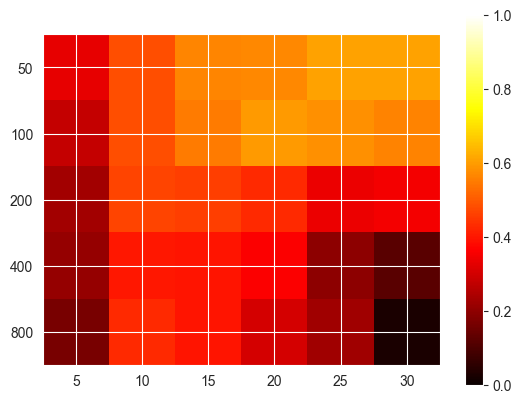

[[0.28345278 0.30247154 0.30436375 0.3046084  0.3006202  0.30023352]
 [0.32560507 0.3560273  0.38758821 0.37729157 0.41370034 0.42209105]
 [0.33399167 0.40019767 0.522818   0.57005522 0.65594368 0.65057918]
 [0.36233193 0.48199764 0.5804838  0.63276603 0.80184102 0.88043923]
 [0.31398617 0.4461031  0.57783418 0.69065708 0.77674128 0.97452186]]
[[0.61537347 0.78622494 0.86805961 0.87343323 0.90799234 0.90623951]
 [0.60442687 0.8401456  0.93622469 0.97196302 0.99349957 0.98093506]
 [0.56425435 0.86604193 0.97997567 0.99636705 0.99392852 0.999     ]
 [0.5699641  0.88292941 0.97777596 0.99318799 0.99970149 1.        ]
 [0.48106282 0.87294103 0.9744545  0.99195095 0.99944444 1.        ]]


In [3]:
create_heatmap_generated_data_precision(calculate_y_morris, 30, package, None, 50)

experiment 1000/1000

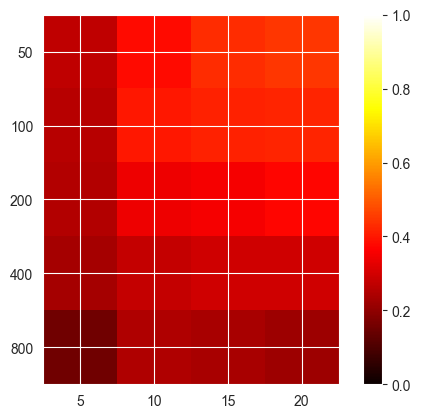

[[0.51564607 0.52205279 0.53392002 0.52486965]
 [0.5354493  0.53877477 0.55274851 0.56117734]
 [0.57078756 0.61207838 0.62470529 0.61939437]
 [0.62035138 0.6803045  0.70002706 0.70451382]
 [0.64546051 0.73043911 0.7545737  0.77692665]]
[[0.78692024 0.90162039 0.96727591 0.97105526]
 [0.79538416 0.94074942 0.96926137 0.98289898]
 [0.82121596 0.95582799 0.9799165  0.99392151]
 [0.85381875 0.96071957 0.99575499 0.99863829]
 [0.80141298 0.97702574 0.9917491  0.99895597]]


In [4]:
create_heatmap_generated_data_precision(calculate_y_moon2010, 20, package, None, 50)

experiment 1000/1000

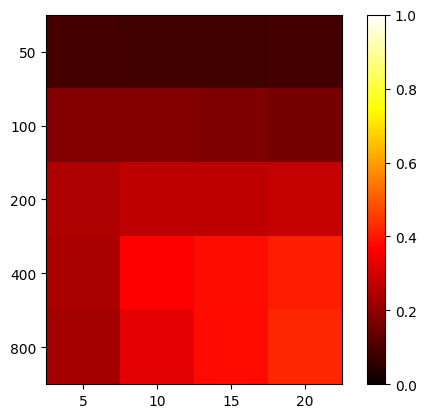

[[0.01001771 0.00866605 0.00810291 0.008673  ]
 [0.0145887  0.01346038 0.01322886 0.01318368]
 [0.02229286 0.01571459 0.01118649 0.01208074]
 [0.0411081  0.03215177 0.02846641 0.02685587]
 [0.0928478  0.09119585 0.06718163 0.03885617]]
[[0.09612121 0.09265967 0.09011272 0.09593407]
 [0.19606061 0.19430303 0.19212121 0.1769697 ]
 [0.27205261 0.28531344 0.28213986 0.29190909]
 [0.28077156 0.39781818 0.41452914 0.43354745]
 [0.32471562 0.41911655 0.44996503 0.46141492]]


In [3]:
create_heatmap_generated_data_precision(calculate_y_sobol_levitan1999, 20, package, None, 50)

In [ ]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1
data = get_data('susy')

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
            
            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None
            
            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

                # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

                # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)
            
                #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n]*2, stratify=data_temp['label'])
        
            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values
            
            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values
            
            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions)-1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data_onebox(box, x_test, y_test))           
        
        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test) 
        k = k + 1

plt.imshow(res_train-res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.colorbar()
plt.show()

In [ ]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1
data = get_data('higgs')

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts) * len(atrs)))

            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None

            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

            # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

            # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)

            #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n] * 2, stratify=data_temp['label'])

            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values

            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values

            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions) - 1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data_onebox(box, x_test, y_test))

        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test)
        k = k + 1

plt.imshow(res_train - res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.colorbar()
plt.show()